In [1]:
%matplotlib widget

In [2]:
import numpy as np
import math
from spatialmath import SE3
from spatialmath.base import e2h,h2e
from roboticstoolbox import *

In [3]:
#相机DH
DFbot = DHRobot(
    [
        RevoluteMDH(d=0.04145,qlim=np.array([-np.pi,np.pi])),
        RevoluteMDH(alpha=np.pi/2,qlim=np.array([-np.pi,np.pi])),
        RevoluteMDH(a=-0.08285,qlim=np.array([-np.pi,np.pi])),
        RevoluteMDH(a=-0.08285,qlim=np.array([-np.pi,np.pi])),
        RevoluteMDH(alpha=-np.pi/2,qlim=np.array([0,np.pi])),
        RevoluteMDH(a=0.05,d=0.06,qlim=np.array([-np.pi,np.pi]))
    ],
    name = "DFbot",
)

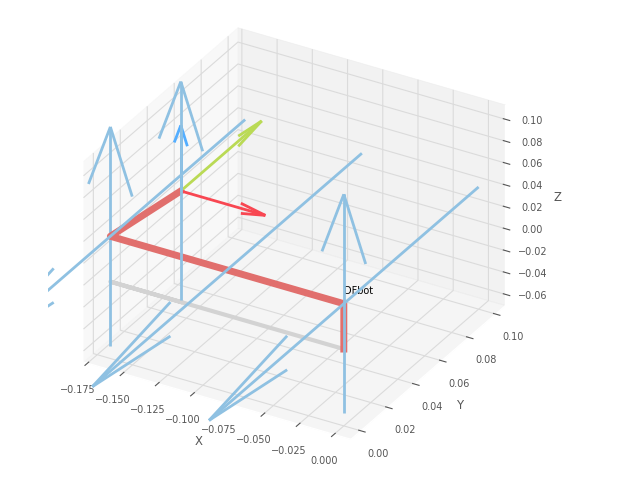

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'DFbot')

In [4]:
DFbot.plot([0,0,0,0,0,0])

In [5]:
mtx = np.array([[913.08825216,   0.        , 327.50021778],
       [  0.        , 917.24582554, 228.7678789 ],
       [  0.        ,   0.        ,   1.        ]])

In [6]:
#投影矩阵
P0 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0]])

In [7]:
K = mtx@P0
K

array([[913.08825216,   0.        , 327.50021778,   0.        ],
       [  0.        , 917.24582554, 228.7678789 ,   0.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ]])

In [8]:
#位姿矩阵为相机T的逆矩阵
T1 = DFbot.fkine([np.pi/2,-np.pi/6,0,np.pi,0,0])
T1

   0        -1         0         0         
  -0.866     0        -0.5      -0.2168    
   0.5       0        -0.866     0.09734   
   0         0         0         1         


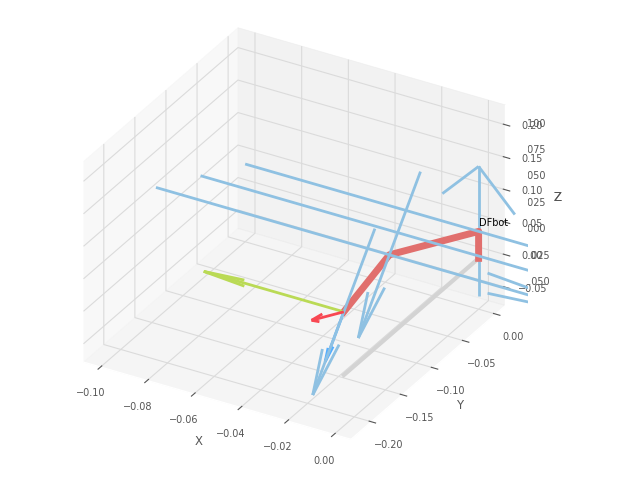

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'DFbot')

In [9]:
DFbot.plot([np.pi/2,-np.pi/6,0,np.pi,0,0])

In [10]:
P = np.array([0,-0.28,0]) #空间中的一点

In [11]:
P1=e2h(P)
P1 #将空间点转换为齐次矩阵

array([[ 0.  ],
       [-0.28],
       [ 0.  ],
       [ 1.  ]])

In [12]:
extrinsic = np.linalg.inv(T1)
extrinsic #外参矩阵

array([[-8.36449319e-17, -8.66025404e-01,  5.00000000e-01,
        -2.36425000e-01],
       [-1.00000000e+00,  3.06161700e-17, -1.14261102e-16,
         4.73612267e-18],
       [ 8.36449319e-17, -5.00000000e-01, -8.66025404e-01,
        -2.41032470e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [13]:
P3d = K@extrinsic@P1
P3d #P3d = Zc[u v 1]^T

array([[43.49145606],
       [26.51345435],
       [ 0.11589675]])

In [14]:
P3d/P3d[-1]

array([[375.26034975],
       [228.7678789 ],
       [  1.        ]])